In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [ ]:
df=pd.read_excel("hw#2_data.xlsx")

In [ ]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005


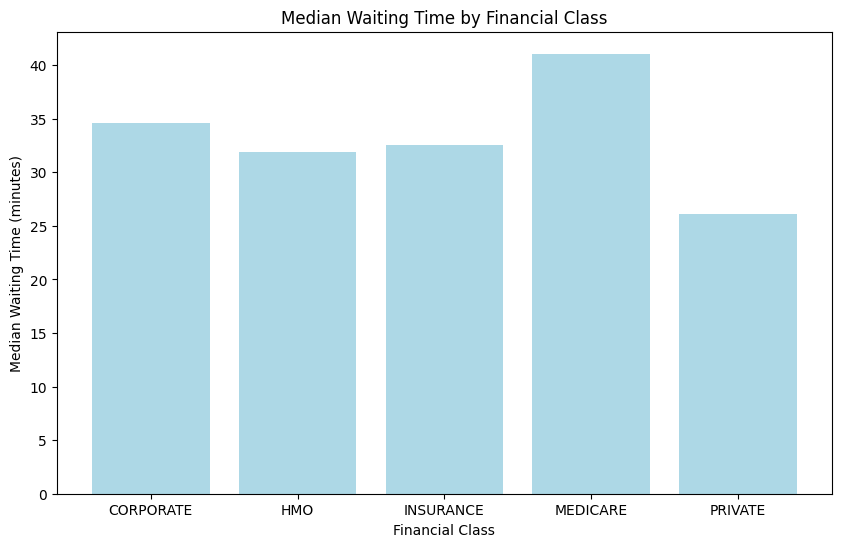

In [ ]:
# Convert the 'Entry Time' column to datetime format using the specified time format
df['Entry Time'] = pd.to_datetime(df['Entry Time'], format='%H:%M:%S')

# Convert the 'Completion Time' column to datetime format using the specified time format
df['Completion Time'] = pd.to_datetime(df['Completion Time'], format='%H:%M:%S')

# Calculate the waiting time in minutes by subtracting 'Entry Time' from 'Completion Time' and converting the result from seconds to minutes
df['Waiting Time (minutes)'] = (df['Completion Time'] - df['Entry Time']).dt.total_seconds() / 60

# Group the data by 'Financial Class' and calculate the median waiting time for each class, then reset the index for easier plotting
median_waiting_time = df.groupby('Financial Class')['Waiting Time (minutes)'].median().reset_index()

# Create a figure for the plot with a specific size
plt.figure(figsize=(10, 6))

# Create a bar chart to visualize the median waiting time by financial class, using light blue bars
plt.bar(median_waiting_time['Financial Class'], median_waiting_time['Waiting Time (minutes)'], color='lightblue')

# Label the x-axis as 'Financial Class'
plt.xlabel('Financial Class')

# Label the y-axis as 'Median Waiting Time (minutes)'
plt.ylabel('Median Waiting Time (minutes)')

# Set the title of the plot to 'Median Waiting Time by Financial Class'
plt.title('Median Waiting Time by Financial Class')

# Display the plot
plt.show()


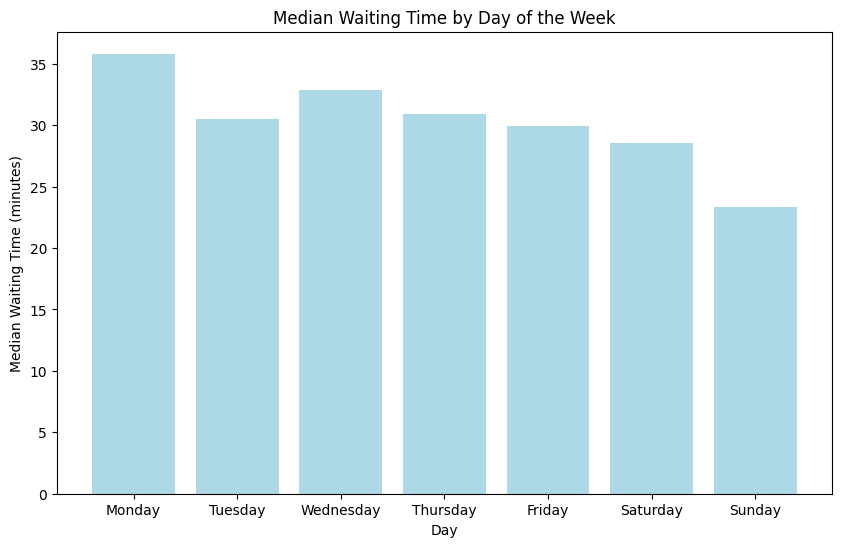

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week from the 'Date' column and create a new column 'Day' containing the day names (e.g., Monday, Tuesday)
df['Day'] = df['Date'].dt.day_name()

# Group the data by 'Day' and calculate the median waiting time for each day of the week
# The days are then reindexed to ensure they appear in the correct order from Monday to Sunday
median_waiting_time_day = df.groupby('Day')['Waiting Time (minutes)'].median().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(median_waiting_time_day['Day'], median_waiting_time_day['Waiting Time (minutes)'], color='lightblue')
plt.xlabel('Day')
plt.ylabel('Median Waiting Time (minutes)')
plt.title('Median Waiting Time by Day of the Week')
plt.show()


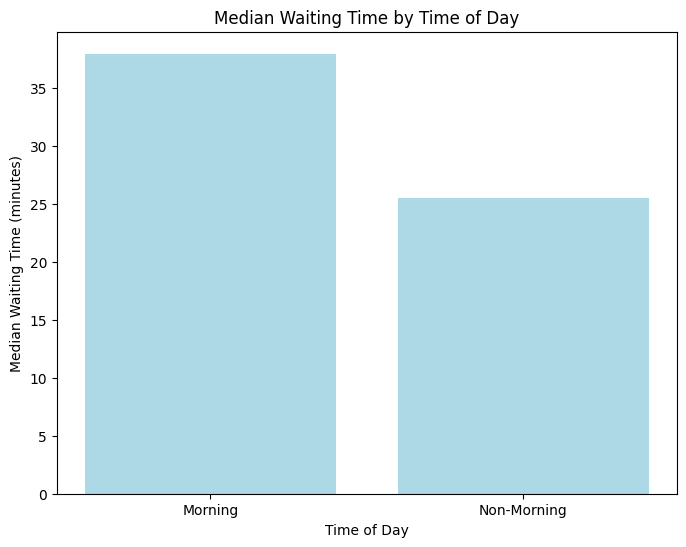

In [ ]:
# Define the start time of "Morning" as 06:00:00 and convert it to a time object
morning_start = pd.to_datetime('06:00:00').time()

# Define the end time of "Morning" as 12:00:00 and convert it to a time object
morning_end = pd.to_datetime('12:00:00').time()

# Categorize the 'Entry Time' into "Morning" if it falls between 06:00:00 and 12:00:00, otherwise categorize it as "Non-Morning"
df['Time of Day'] = df['Entry Time'].apply(lambda x: 'Morning' if morning_start <= x.time() <= morning_end else 'Non-Morning')

# Group the data by 'Time of Day' and calculate the median waiting time for each category ("Morning" and "Non-Morning")
median_waiting_time_time_of_day = df.groupby('Time of Day')['Waiting Time (minutes)'].median().reset_index()


# Plotting
plt.figure(figsize=(8, 6))
plt.bar(median_waiting_time_time_of_day['Time of Day'], median_waiting_time_time_of_day['Waiting Time (minutes)'], color='lightblue')
plt.xlabel('Time of Day')
plt.ylabel('Median Waiting Time (minutes)')
plt.title('Median Waiting Time by Time of Day')
plt.show()
